<h2><center>SMS Spam Detection - Machine Learning Project</center></h2>
<br/>
<center><h3>PROJECT DONE BY</h3></center>
<center><h5>Sunil Kumar Mano</h5></center>
<center><h5>AI and Machine Learning practitioner</h5></center>
<center><h5>Email: sunilkumarm.182@gmail.com</h5></center>


### 1. Introduction

In this Machine Learning project, we are taking an interesting use case of __NLP(Natural Language Processing).__

#### Context

The SMS Spam detection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains a set of SMS messages in English of 5,574 messages, tagged acording being __ham__ (legitimate) or __spam.__

#### Content

Our Input file taken for research contain one message per line. Each line is composed by two columns: 

- v1 contains the label (ham or spam) 
- v2 contains the raw text


This corpus has been collected from free or free for research sources at the Internet:

- A collection of 425 SMS spam messages was manually extracted from the __[Grumbletext Web site](http://www.grumbletext.co.uk/)__. This is a UK forum in which cell phone users make public claims about SMS spam messages, most of them without reporting the very spam message received. The identification of the text of spam messages in the claims is a very hard and time-consuming task, and it involved carefully scanning hundreds of web pages.

- A subset of 3,375 SMS randomly chosen ham messages of the NUS SMS Corpus (NSC), which is a dataset of about 10,000 legitimate messages collected for research at the Department of Computer Science at the National University of Singapore. The messages largely originate from Singaporeans and mostly from students attending the University. These messages were collected from volunteers who were made aware that their contributions were going to be made publicly available. 

- A list of 450 SMS ham messages collected from Caroline Tag's PhD Thesis available at [Web Link](http://etheses.bham.ac.uk/253/1/Tagg09PhD.pdf). 

-  Finally, we have incorporated the [SMS Spam Corpus v.0.1 Big](http://www.esp.uem.es/jmgomez/smsspamcorpus/). It has 1,002 SMS ham messages and 322 spam messages.

### 2. Import the packages and data

#### 2.1 Import the packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### 2.2 Import the dataset

In [3]:
sms_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/Assignment/spam.csv", encoding = "latin-1")
sms_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


We are mentioned Latin-1 encoding because we are using the dataset that represents the alphabets of Western European languages. Latin-1, also called ISO-8859-1, is an 8-bit character set endorsed by the International Organization for Standardization (ISO) and represents the alphabets of Western European languages. As its name implies, it is a subset of ISO-8859, which includes several other related sets for writing systems like __Cyrillic, Hebrew, and Arabic.__

### 3. Exploratory Data Analysis

#### 3.1 Dropping the unwanted columns

We are dropping the columns __Unnamed: 2__, __Unnamed: 3__, __Unnamed: 4__ because they are empty and not required for analysis.

In [4]:
sms_data = sms_data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
sms_data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 3.2 Renaming the columns

We are renaming the columns from __'v1' to 'label'__ and __'v2' to 'sms'.__

In [7]:
sms_data = sms_data.rename(columns = {"v1" : "label", "v2" : "sms"})
sms_data.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### 3.3 Checking the length of the dataset

In [9]:
print(len(sms_data))

5572


Our dataset has 5572 observations of sms data for building our model.

#### 3.4 Checking the number of ham and spam messages

In [10]:
sms_data.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

#### 3.5 Statistical summary of the data

In [11]:
sms_data.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


#### 3.6 Concise summary of the dataset

In [12]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
sms      5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


We have two columns in our dataset, contaning __object/String__ type values.

#### 3.7 Creating a new column "length"

Creating a new column "length" which contains the number of characters present in the each sms observation/record.

In [14]:
sms_data["length"] = sms_data["sms"].apply(len)
sms_data.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


### 4. Data Visualization

#### 4.1 Visualizing the length of the SMS observations/records

Let's visualize the distribution of the length of the sms messages in our dataset.

Text(0.5, 1.0, 'Distribution of length of the SMS messages')

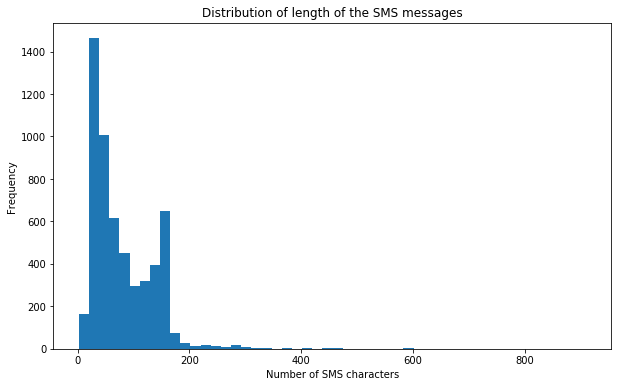

In [20]:
plt.figure(figsize = (10, 6))
sms_data.length.plot(kind = "hist", bins = 50)
plt.xlabel("Number of SMS characters")
plt.title("Distribution of length of the SMS messages")

#### Observation:
- From the visualization, we can able to understand that most of the messages are of lesser length of 200 characters.
- Distribution of the SMS length is right skewed.

#### 4.2 Visualizing the length of ham and spam messages

Let's visualize the distribution of length of the sms in both ham and spam categories seperately.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BFA8CF6B38>,
      dtype=object)

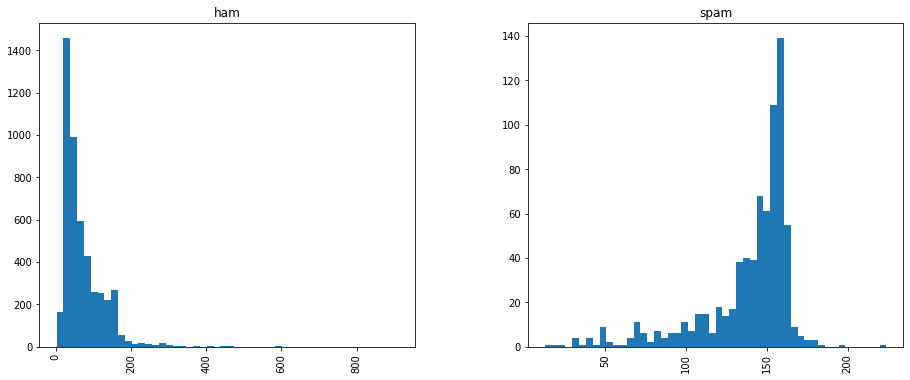

In [23]:
sms_data.hist(column = "length", by = "label", bins = 50, figsize = (15, 6))

#### Observation:

- Most of the ham messages are between 0 to 200 characters of length.
- Most of the spam messages are between 100 to 200 characters of length.

#### 4.3 Applying the label encoding for "label" column

As computer recognizes values only in terms of numerical values, we are converting the ham and spam labels to 0s and 1s.

- ham is labeled as 0
- spam is labeled as 1

In [24]:
sms_data["label"] = sms_data.label.map({"ham" : 0, "spam" : 1})
sms_data.head()

,label,sms,length
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### Bag of Words Approach

What we have here in our dataset is a large collection of text data (5,572 rows of data). Most of ML algorithms rely on numerical data to be fed into them as input, and email/sms messages are usually text heavy. We need a way to represent text data for machine learning algorithm and the __bag-of-words__ model helps us to achieve that task.

- It is a way of __extracting features from the text__ for use in machine learning algorithms.
- In this approach, we use the tokenized words for each observation and find out the frequency of each token.
- Using a process which we will go through now, we can convert a collection of documents to a matrix, with each document being a row and each word(token) being the column, and the corresponding (row, column) values being the frequency of occurrence of each word or token in that document.

__Understanding the approach using an example:__

Lets say we have 4 documents as follows:

**['Hello, how are you!',
'Win money, win from home.',
'Call me now',
'Hello, Call you tomorrow?']**

Our objective here is to convert this set of text to a frequency distribution matrix, as follows.

<img src="https://user-images.githubusercontent.com/14823445/38343939-c03c0b18-3854-11e8-9fb8-7b4ea8be01cb.png" alt="table">

Here as we can see, the documents are numbered in the rows, and each word is a column name, with the corresponding value being the frequency of that word in the document.

Lets break this down and see how we can do this conversion using a small set of documents.

To handle this, we will be using sklearns count vectorizer method which does the following:

1. It tokenizes the string(separates the string into individual words) and gives an integer ID to each token.
2. It counts the occurrence of each of those tokens.

### Implementation of Bag of Words(Manual Approach)

__Step 1: Convert all strings to their lower case form.__

In [29]:
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call you tomorrow?']

lower_case_documents = [i.lower() for i in documents]
lower_case_documents

['hello, how are you!',
 'win money, win from home.',
 'call me now.',
 'hello, call you tomorrow?']

__Step 2: Removing all the punctuations__

In [36]:
import string

new_documents = []

for i in lower_case_documents:
    new_documents.append(i.translate(str.maketrans("","", string.punctuation)))

new_documents

['hello how are you',
 'win money win from home',
 'call me now',
 'hello call you tomorrow']

__Step 3: String Tokenization__

In [38]:
processed_documents = [[w for w in i.split()] for i in new_documents]
processed_documents

[['hello', 'how', 'are', 'you'],
 ['win', 'money', 'win', 'from', 'home'],
 ['call', 'me', 'now'],
 ['hello', 'call', 'you', 'tomorrow']]

__Step 4: Count Frequencies__

In [39]:
from collections import Counter

frequency_list = []
frequency_list = [Counter(i) for i in processed_documents]
frequency_list

[Counter({'hello': 1, 'how': 1, 'are': 1, 'you': 1}),
 Counter({'win': 2, 'money': 1, 'from': 1, 'home': 1}),
 Counter({'call': 1, 'me': 1, 'now': 1}),
 Counter({'hello': 1, 'call': 1, 'you': 1, 'tomorrow': 1})]

### Implementation of Bag of Words(Using Scikit-learn)

__Data preprocessing with CountVectorizer()__

In the above steps, we implemented a version of __CountVectorizer()__ method from scratch that involved cleaning our data first.

- This cleaning involved converting all of our data to lower case and removing all punctuation marks.
- CountVectorizer() has certain __parameters__ which take care of these steps for us. They are:
        
        - lowercase = True  
        The lowercase parameter has a default value of True which converts all of our text to its lower case form.
        
        - token_pattern = (?u)\\b\\w\\w+\\b 
        The token_pattern parameter has a default regular expression value of -
        (?u)\\b\\w\\w+\\b which ignores all punctuation marks and treats them as delimiters, while accepting
        alphanumeric strings of length greater than or equal to 2, as individual tokens or words.
        
        - stop_words 
        The stop_words parameter, if set to english will remove all words from our document set that match a 
        list of English stop words which is defined in scikit-learn. Considering the size of our dataset and the fact 
        that we are dealing with SMS messages and not larger text sources like e-mail, we will not be setting this 
        parameter value.

__Import CountVetorizer() and fitting the values__

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
count_vectorizer.fit(documents)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

__Getting the Feature names__

In [44]:
count_vectorizer.get_feature_names()

['are',
 'call',
 'from',
 'hello',
 'home',
 'how',
 'me',
 'money',
 'now',
 'tomorrow',
 'win',
 'you']

__Creating an array of values contaning the number of tokens__

In [45]:
documents_array = count_vectorizer.transform(documents).toarray()
documents_array

array([[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0],
       [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1]], dtype=int64)

__Creating a DataFrame contaning the tokens as columns and number of tokens as records__

In [46]:
frequency_matrix = pd.DataFrame(documents_array, columns = count_vectorizer.get_feature_names())
frequency_matrix

,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,1,0,0,0,0,0,1,0,1


__Inference:__

So, we have created the DataFrame with tokens as the column name and the count of tokens present in each records. We are going to apply the same prcedure in our SMS spam dataset to create a DataFrame containing tokens as the column name and the count of tokens present in each records.